In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib

%matplotlib inline

In [3]:
import os
%matplotlib inline
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '09212020-page8.pdf',
 '6211',
 'Answers',
 'basics.py',
 'DataManipulation-InsurancePortfolio.ipynb',
 'desktop.ini',
 'Discord.lnk',
 'example_portfolio.csv',
 'example_portfolio_report',
 'example_portfolio_report.html',
 'IMVU.lnk',
 'mbox-short.txt',
 'Python62100',
 'RyanCarriere_Helloworld.py',
 'summary.csv',
 'untitled',
 'Untitled.ipynb',
 'untitled.txt',
 'untitled1',
 'Untitled1.ipynb',
 'Visual Studio Code.lnk']

In [4]:
df = pd.read_csv('example_portfolio.csv', index_col = 'PolicyNo') 
#Q2: Read 1st 7 rows of dataframe
df[0:7]

,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,Vehicle_Performance,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
PolicyNo,,,,,,,,,,,,,,,,,,,,,
164562033,Standard,6,Direct Billed to Insured,Pre-paid,N,42602,31,1990,DODG CARAVAN SE,Standard,...,20-50,2006,Y,N,111.30,0,0.0,0.0,0.0,0.0
165119133,Standard,6,Direct Billed to Insured,Pre-paid,N,42857,35,2001,BUIK REG LS-LSE,Standard,...,20-50,2006,Y,N,408.10,0,0.0,0.0,0.0,0.0
165166239,Standard,6,Direct Billed to Insured,Pre-paid,N,42980,30,1977,FORD TRUCK,Standard,...,100-400,2006,Y,N,125.08,0,0.0,0.0,0.0,0.0
165198832,Standard,6,Direct Billed to Insured,Installment,N,43050,35,2002,TYTA TUNDRA SR5,Standard,...,100-200,2006,Y,N,554.38,0,0.0,0.0,0.0,0.0
165319534,Standard,6,Direct Billed to Insured,Pre-paid,N,42496,35,1992,CHEV CAMARO RS,Sports,...,20-50,2006,Y,N,129.32,0,0.0,0.0,0.0,0.0
165355034,Standard,6,Direct Billed to Insured,Installment,N,42361,30,1992,FORD RANGER,Standard,...,20-50,2006,Y,N,279.84,0,0.0,0.0,0.0,0.0
165386232,Standard,6,Direct Billed to Insured,Pre-paid,N,42357,37,1955,CHEV BELAIR 2DR,Standard,...,40-100,2006,N,N,142.04,0,0.0,0.0,0.0,0.0


In [5]:
#Q3
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4964 entries, 164562033 to 381258900
Data columns (total 68 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Policy_Company                            4964 non-null   object 
 1   Policy_Installment_Term                   4964 non-null   int64  
 2   Policy_Billing_Code                       4964 non-null   object 
 3   Policy_Method_Of_Payment                  4964 non-null   object 
 4   Policy_Reinstatement_Fee_Indicator        4964 non-null   object 
 5   Policy_Zip_Code_Garaging_Location         4964 non-null   object 
 6   Vehicle_Territory                         4964 non-null   int64  
 7   Vehicle_Make_Year                         4964 non-null   int64  
 8   Vehicle_Make_Description                  4964 non-null   object 
 9   Vehicle_Performance                       4964 non-null   object 
 10  Vehicle_New_Cost_Amount

In [6]:
len(df)

4964

In [7]:
print(df.shape)

(4964, 68)


In [8]:
#Q4
#Creating df2
#given by TA
columns = ['Vehicle_Anti_Theft_Device', 'Driver_Minimum_Age', 'Vehicle_Age_In_Years',
           'Annual_Premium', 'Loss_Amount']
df2 = df[columns]
df2

,Vehicle_Anti_Theft_Device,Driver_Minimum_Age,Vehicle_Age_In_Years,Annual_Premium,Loss_Amount
PolicyNo,,,,,
164562033,Not Applicable,61,9,111.30,0.0
165119133,Not Applicable,55,6,408.10,0.0
165166239,Not Applicable,47,9,125.08,0.0
165198832,Not Applicable,37,5,554.38,0.0
165319534,Not Applicable,48,9,129.32,0.0
...,...,...,...,...,...
381137600,Passive Disabling-Vehicle Recovery,66,7,140.98,0.0
381140200,Passive Disabling-Vehicle Recovery,24,1,594.66,0.0
381148600,Not Applicable,46,9,197.22,0.0


In [9]:
#Q5
mean = df2.mean()
print("Means:\n",mean)
std = df2.std()
print("Standard Deviation:\n",std)
minimum = df2.min()
print("Mins:\n",minimum)
maximum = df2.max()
print("Maxs:\n",maximum)
df2.describe()

Means:
 Driver_Minimum_Age       46.088437
Vehicle_Age_In_Years      7.067284
Annual_Premium          336.519879
Loss_Amount             280.861543
dtype: float64
Standard Deviation:
 Driver_Minimum_Age        15.818078
Vehicle_Age_In_Years       2.577883
Annual_Premium           211.493071
Loss_Amount             4760.610938
dtype: float64
Mins:
 Vehicle_Anti_Theft_Device    Active Disabling
Driver_Minimum_Age                         16
Vehicle_Age_In_Years                        1
Annual_Premium                            0.6
Loss_Amount                                 0
dtype: object
Maxs:
 Vehicle_Anti_Theft_Device    Passive Disabling-Vehicle Recovery
Driver_Minimum_Age                                           93
Vehicle_Age_In_Years                                          9
Annual_Premium                                          2336.24
Loss_Amount                                              297025
dtype: object


,Driver_Minimum_Age,Vehicle_Age_In_Years,Annual_Premium,Loss_Amount
count,4964.000000,4964.000000,4964.000000,4964.000000
mean,46.088437,7.067284,336.519879,280.861543
std,15.818078,2.577883,211.493071,4760.610938
min,16.000000,1.000000,0.600000,0.000000
25%,35.000000,5.000000,160.060000,0.000000
50%,46.000000,9.000000,328.600000,0.000000
75%,57.000000,9.000000,444.140000,0.000000
max,93.000000,9.000000,2336.240000,297025.000000


In [10]:
#Q6
print(df2['Vehicle_Anti_Theft_Device'].unique())

['Not Applicable' 'Passive Disabling-Vehicle Recovery' 'Alarm Only'
 'Active Disabling']


In [11]:
#Q7
Premiums = df2["Annual_Premium"].sum()
print("Premiums:", Premiums)
Losses = df2["Loss_Amount"].sum()
print("Losses:",Losses)
LossRatio = Premiums/Losses
print("Loss Ratio:", LossRatio)

Premiums: 1670484.6800000002
Losses: 1394196.7000000002
Loss Ratio: 1.198170014317205


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3C3460408>]],
      dtype=object)

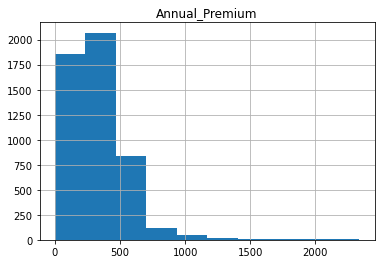

In [12]:
#Q8
df2.hist(column= "Annual_Premium")

In [13]:
#Q9
df3 = df2.groupby('Vehicle_Anti_Theft_Device').mean()
df3

,Driver_Minimum_Age,Vehicle_Age_In_Years,Annual_Premium,Loss_Amount
Vehicle_Anti_Theft_Device,,,,
Active Disabling,47.183486,6.247706,424.710275,80.228807
Alarm Only,46.151282,5.987179,415.552846,305.996641
Not Applicable,47.352516,8.283253,263.447212,158.091151
Passive Disabling-Vehicle Recovery,43.649392,5.136276,446.322354,516.527543


In [14]:
#Q10
df3.index

Index(['Active Disabling', 'Alarm Only', 'Not Applicable',
       'Passive Disabling-Vehicle Recovery'],
      dtype='object', name='Vehicle_Anti_Theft_Device')

In [15]:
#Q11
df3['Loss_Ratio'] = df3['Loss_Amount'] / df3['Annual_Premium']
df3['Loss_Ratio']
df3

,Driver_Minimum_Age,Vehicle_Age_In_Years,Annual_Premium,Loss_Amount,Loss_Ratio
Vehicle_Anti_Theft_Device,,,,,
Active Disabling,47.183486,6.247706,424.710275,80.228807,0.188902
Alarm Only,46.151282,5.987179,415.552846,305.996641,0.736360
Not Applicable,47.352516,8.283253,263.447212,158.091151,0.600087
Passive Disabling-Vehicle Recovery,43.649392,5.136276,446.322354,516.527543,1.157297


In [16]:
#Q12
df3.sort_values(by='Loss_Ratio', ascending=True)

,Driver_Minimum_Age,Vehicle_Age_In_Years,Annual_Premium,Loss_Amount,Loss_Ratio
Vehicle_Anti_Theft_Device,,,,,
Active Disabling,47.183486,6.247706,424.710275,80.228807,0.188902
Not Applicable,47.352516,8.283253,263.447212,158.091151,0.600087
Alarm Only,46.151282,5.987179,415.552846,305.996641,0.736360
Passive Disabling-Vehicle Recovery,43.649392,5.136276,446.322354,516.527543,1.157297


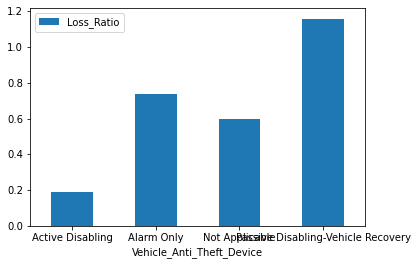

In [17]:
#Q13
df3.plot.bar(y='Loss_Ratio', rot=0)

In [18]:
#Q14
#Conclusion from the bar plot above:
#The loss ratio based on the type of vehicle anti theft device indicates that Passively Disabling-Vehicle Recovery has the highest 
#loss ratio which further implies the annual premiumn and loan amount could be high for the insurer; and hence
#when this high, insurance companies would be paying out more claims thus losing profit for themselves

In [19]:
#Q15
df3.to_csv('summary.csv')

In [20]:
#Q16
n = np.matrix(df3['Loss_Amount'],df3['Annual_Premium'])
n

matrix([[ 80.22880734, 305.99664103, 158.09115093, 516.52754319]])

In [21]:
n1 = np.matrix(df3['Annual_Premium'],df3['Loss_Amount'])
n1

matrix([[424.71027523, 415.55284615, 263.44721227, 446.32235445]])

In [22]:
#Q17
n.T

matrix([[ 80.22880734],
        [305.99664103],
        [158.09115093],
        [516.52754319]])

In [23]:
n1.T

matrix([[424.71027523],
        [415.55284615],
        [263.44721227],
        [446.32235445]])

In [24]:
#Q18
v = np.copy(n.T[2])
v

array([[158.09115093]])

In [25]:
v1 = np.copy(n1.T[2])
v1

array([[263.44721227]])

In [26]:
#Q19
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("example_portfolio_report.html")

In [27]:
#20
#Our first finding from the report was the abundance of highly correlated variables. There were a total of ten different relationships are co-dependent on each other.
#Each policyno corresponds to one type of vehicle anti theft device. All the values are distinct values.
#There are 4 highly skewed columns (Loss_Amount, Frequency, Severity, Loss_Ratio) which are also zero columns. I think given these skewed columns which don't have any data populated in them, I think its just adding overhead/overfitting our model. In a sense, I think these act as outliers to the overall data set.
